# Time series forecasting

# Initial setup

## Import required packages

In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Import time series data: Airline passenger traffic

In [59]:
data = pd.read_csv('data/airline-passenger-traffic.csv', header = None)
data.columns = ['Month','Passengers']
data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m')
data = data.set_index('Month')
data.head(12)

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


# Time series analysis

## Plot time series data

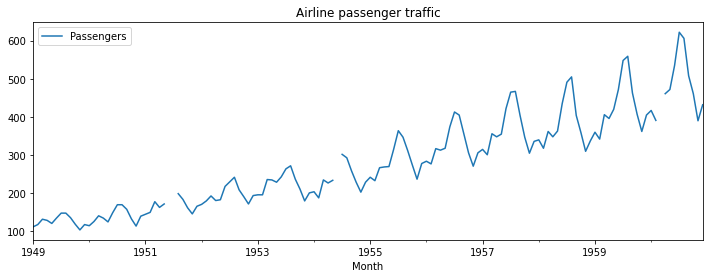

In [60]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

## Missing value treatment

### Mean imputation

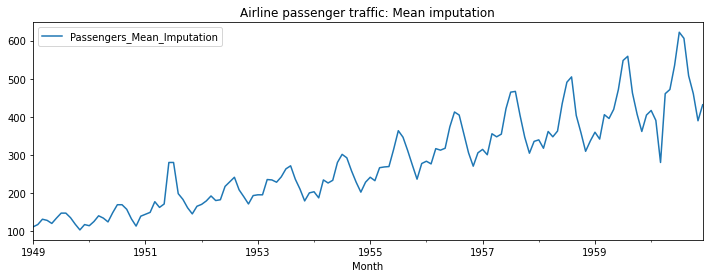

In [61]:
data = data.assign(Passengers_Mean_Imputation=data.Passengers.fillna(data.Passengers.mean()))
data[['Passengers_Mean_Imputation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Mean imputation')
plt.show(block=False)

### Linear interpolation

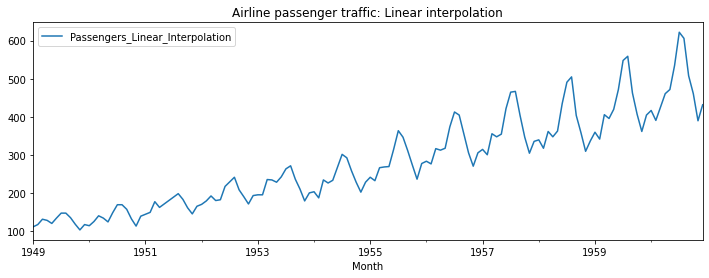

In [62]:
data = data.assign(Passengers_Linear_Interpolation=data.Passengers.interpolate(method='linear'))
data[['Passengers_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic: Linear interpolation')
plt.show(block=False)

### Use linear interpolation to impute missing values

In [63]:
data['Passengers'] = data['Passengers_Linear_Interpolation']
data.drop(columns=['Passengers_Mean_Imputation','Passengers_Linear_Interpolation'],inplace=True)

## Outlier detection

### Box plot and interquartile range

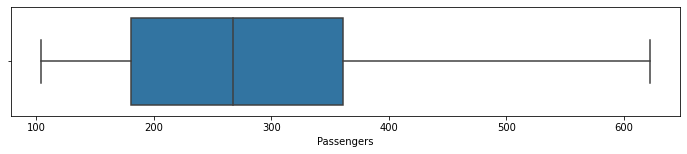

In [64]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Passengers'],whis=1.5)

### Histogram plot

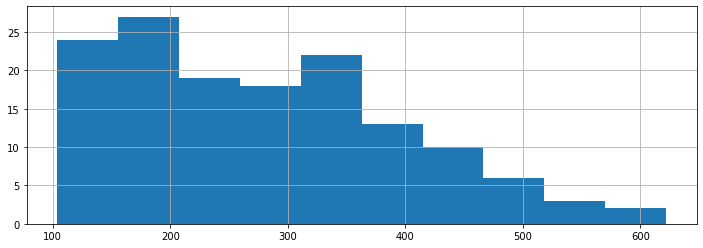

In [65]:
fig = data.Passengers.hist(figsize = (12,4))

## Time series Decomposition

### Additive seasonal decomposition

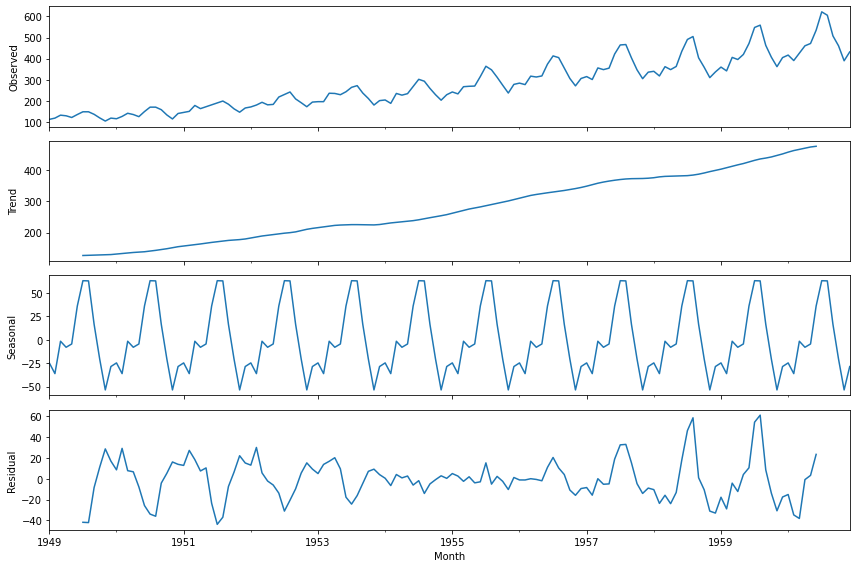

In [66]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Multiplicative seasonal decomposition

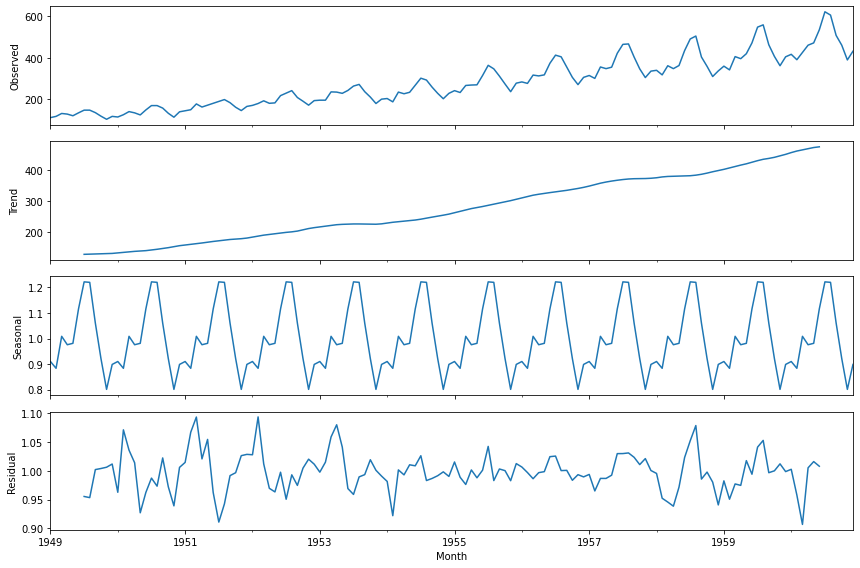

In [67]:
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

# Build and evaluate time series forecast

## Split time series data into training and test set

In [68]:
train_len = 120
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [69]:
test.shape[0], test.index.min()

(24, Timestamp('1959-01-01 00:00:00'))

# Simple time series methods

## Naive method

In [70]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Passengers'][train_len-1]

### Plot train, test and forecast

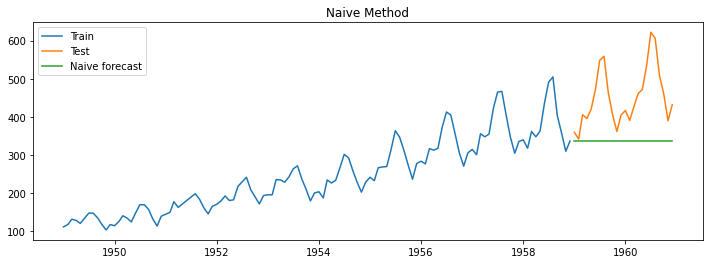

In [71]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

### Calculate RMSE and MAPE

In [72]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_naive['naive_forecast'])/test['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63


## Simple average method

In [73]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

### Plot train, test and forecast

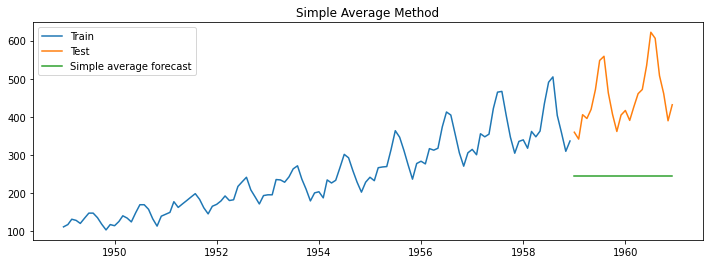

In [74]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculate RMSE and MAPE

In [75]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_avg['avg_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28


## Simple moving average method

In [76]:
y_hat_sma = data.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data['Passengers'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plot train, test and forecast

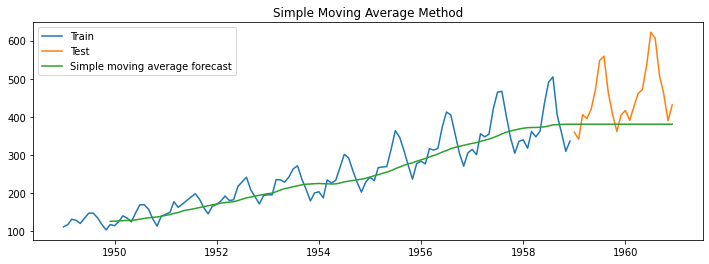

In [77]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [78]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sma['sma_forecast'][train_len:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54


# Exponential smoothing methods

## Simple exponential smoothing

In [79]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Passengers'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


### Plot train, test and forecast

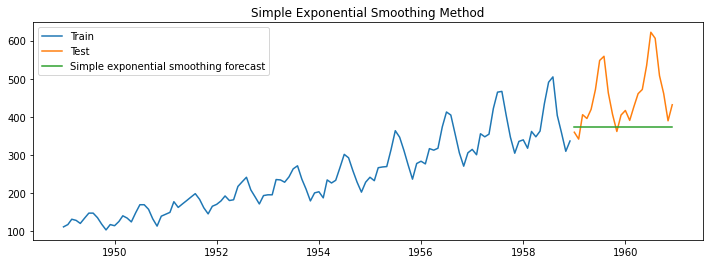

In [80]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

### Calculate RMSE and MAPE

In [81]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ses['ses_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49


## Holt's method with trend

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

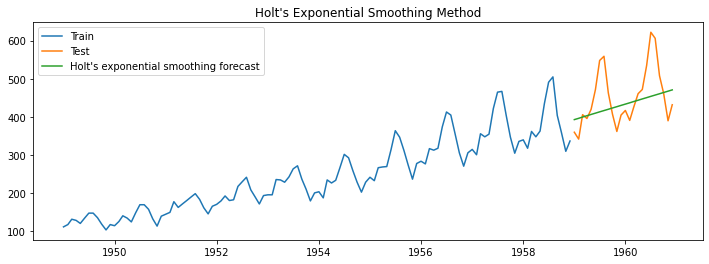

In [83]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculate RSME and MAPE

In [84]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_holt['holt_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11


## Holt Winters' additive method with trend and seasonality

In [85]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.2631578931410023, 'smoothing_slope': 0.05162965362003379, 'smoothing_seasonal': 0.7368421036673181, 'damping_slope': nan, 'initial_level': 211.55099371227195, 'initial_slope': 1.7391959241879844, 'initial_seasons': array([-100.18118278,  -94.20464628,  -80.29175487,  -83.41758377,
        -91.4590812 ,  -77.45094377,  -64.48324418,  -64.5734069 ,
        -76.66644369,  -93.73584385, -108.67611165,  -94.50947787]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

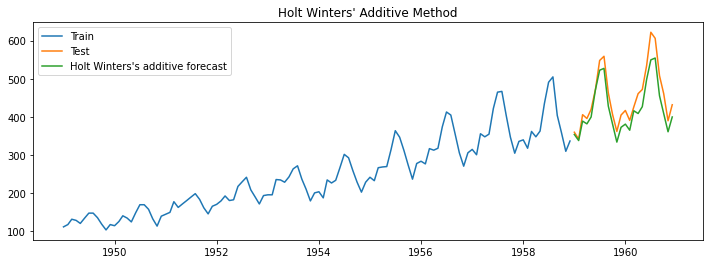

In [86]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

### Calculate RMSE and MAPE

In [87]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwa['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53


## Holt Winter's multiplicative method with trend and seasonality

In [88]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(24)

{'smoothing_level': 0.3854752059775655, 'smoothing_slope': 0.03532512198726199, 'smoothing_seasonal': 0.6145247765854112, 'damping_slope': nan, 'initial_level': 212.39826377189243, 'initial_slope': 1.1085061808204044, 'initial_seasons': array([0.51829335, 0.54671337, 0.60341361, 0.57043893, 0.52096774,
       0.57300963, 0.62819598, 0.62585915, 0.57016694, 0.49504925,
       0.43957122, 0.51435141]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

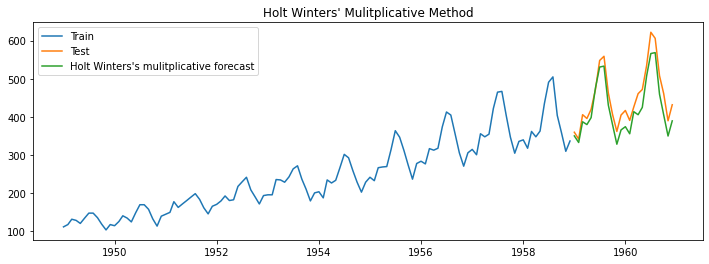

In [89]:
plt.figure(figsize=(12,4))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

### Calculate RMSE and MAPE

In [90]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_hwm['hw_forecast'])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91


# Auto Regressive methods

## Stationarity vs non-stationary time series

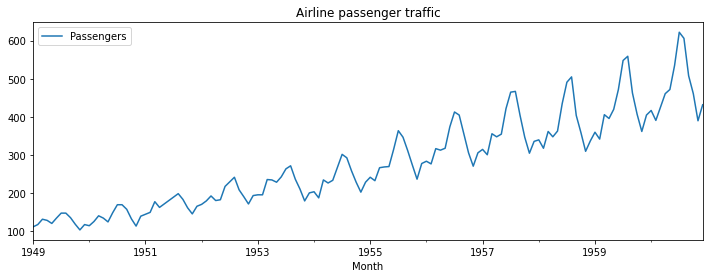

In [91]:
data['Passengers'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Airline passenger traffic')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test
Null Hypothesis: Series is not stationary

In [92]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Passengers'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.894609
Critical Values @ 0.05: -2.88
p-value: 0.993020


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
Null Hypothesis: Series is stationary

In [93]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Passengers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.052050
Critical Values @ 0.05: 0.46
p-value: 0.010000


### Box Cox transformation to make variance constant

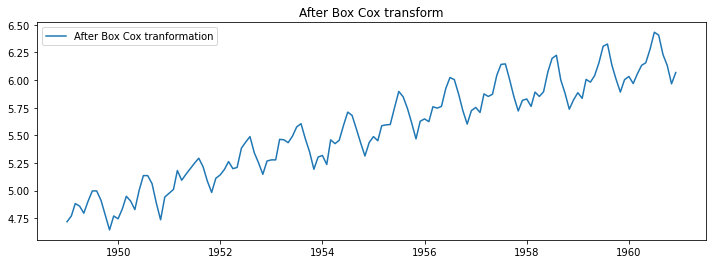

In [94]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

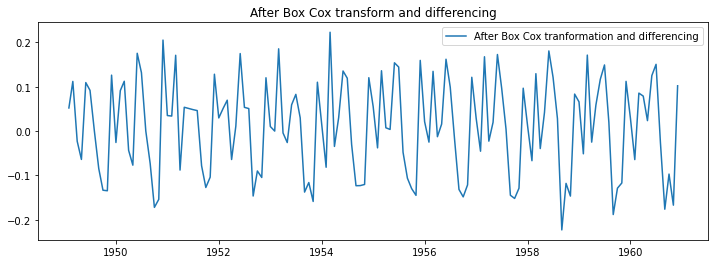

In [95]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [96]:
data_boxcox_diff.dropna(inplace=True)

In [97]:
data_boxcox_diff.tail()

Month
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
dtype: float64

### Augmented Dickey-Fuller (ADF) test

In [98]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.290114
Critical Values @ 0.05: -2.88
p-value: 0.015326


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [99]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.101871
Critical Values @ 0.05: 0.46
p-value: 0.100000


## Autocorrelation function (ACF)

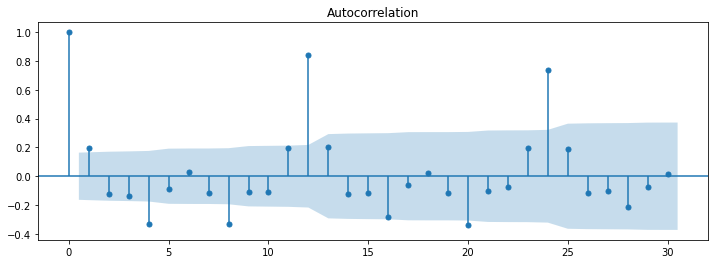

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Partial autocorrelation function (PACF)

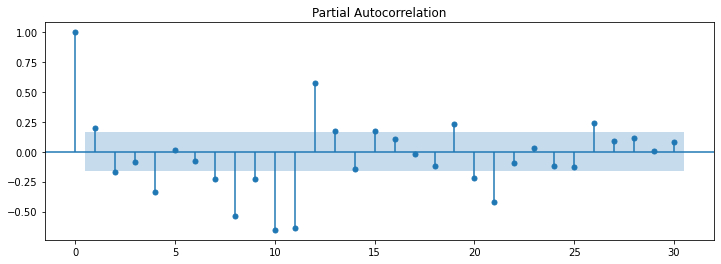

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

## Split into training and test data sets

In [102]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [103]:
data.shape[0], train.shape[0], test.shape[0],  \
data_boxcox.shape[0], train_data_boxcox.shape[0], test_data_boxcox.shape[0], \
data_boxcox_diff.shape[0], train_data_boxcox_diff.shape[0], test_data_boxcox_diff.shape[0]

(144, 120, 24, 144, 120, 24, 143, 119, 24)

In [104]:
train_data_boxcox_diff.head()

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
dtype: float64

## Auto regression method (AR)

In [105]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.50574D-01    |proj g|=  3.28582D-02

At iterate    5    f= -8.50584D-01    |proj g|=  1.99840D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     18      1     0     0   1.998D-07  -8.506D-01
  F = -0.85058350267793770     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.009477
ar.L1.y    0.183116
dtype: float64


 This problem is unconstrained.


### Recover original time series

In [106]:
y_hat_ar = data_boxcox_diff.copy().to_frame()
print(y_hat_ar.shape[0])
print(y_hat_ar.head())
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
print(y_hat_ar.head())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
print(y_hat_ar.head())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
print(y_hat_ar.head())
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])
print(y_hat_ar.shape[0])
y_hat_ar.head()

143
                   0
Month               
1949-02-01  0.052186
1949-03-01  0.112117
1949-04-01 -0.022990
1949-05-01 -0.064022
1949-06-01  0.109484
                   0  ar_forecast_boxcox_diff
Month                                        
1949-02-01  0.052186                 0.009477
1949-03-01  0.112117                 0.017298
1949-04-01 -0.022990                 0.028272
1949-05-01 -0.064022                 0.003532
1949-06-01  0.109484                -0.003982
                   0  ar_forecast_boxcox_diff  ar_forecast_boxcox
Month                                                            
1949-02-01  0.052186                 0.009477            0.009477
1949-03-01  0.112117                 0.017298            0.026775
1949-04-01 -0.022990                 0.028272            0.055047
1949-05-01 -0.064022                 0.003532            0.058578
1949-06-01  0.109484                -0.003982            0.054596
                   0  ar_forecast_boxcox_diff  ar_forecast_boxcox

,0,ar_forecast_boxcox_diff,ar_forecast_boxcox,ar_forecast
Month,,,,
1949-02-01,0.052186,0.009477,4.727976,113.066460
1949-03-01,0.112117,0.017298,4.745273,115.039253
1949-04-01,-0.022990,0.028272,4.773545,118.338061
1949-05-01,-0.064022,0.003532,4.777077,118.756744
1949-06-01,0.109484,-0.003982,4.773095,118.284805


In [107]:
print(data.shape[0], train.shape[0], test.shape[0])
print(data_boxcox.shape[0], train_data_boxcox.shape[0], test_data_boxcox.shape[0])
print(data_boxcox_diff.shape[0], train_data_boxcox_diff.shape[0], test_data_boxcox_diff.shape[0])
print(y_hat_ar.shape[0], y_hat_ar[data_boxcox_diff.index.min():].shape[0], y_hat_ar[:data_boxcox_diff.index.max()].shape[0])
print(y_hat_ar[data_boxcox_diff.index.min():data_boxcox_diff.index.max()].shape[0])

144 120 24
144 120 24
143 119 24
143 143 143
143


### Plot train, test and forecast

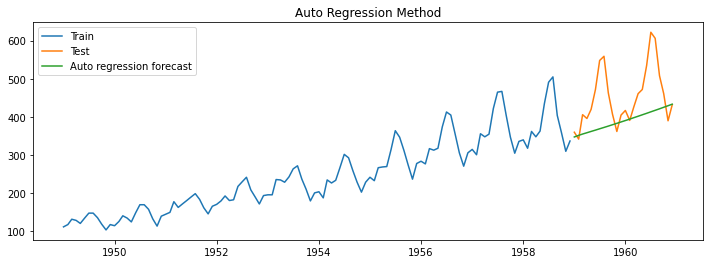

In [108]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

### Calculate RMSE and MAPE

In [109]:
train_len, test.shape[0], test.index.min(), y_hat_ar.shape[0], y_hat_ar[test.index.min():].shape[0]

(120, 24, Timestamp('1959-01-01 00:00:00'), 143, 24)

In [110]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ar['ar_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77


## Moving average method (MA)

In [111]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.58197D-01    |proj g|=  1.14977D-03

At iterate    5    f= -8.58202D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     14      1     0     0   4.441D-08  -8.582D-01
  F = -0.85820180612045738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.009538
ma.L1.y    0.266103
dtype: float64


 This problem is unconstrained.


### Recover original time series

In [112]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

### Plot train, test and forecast

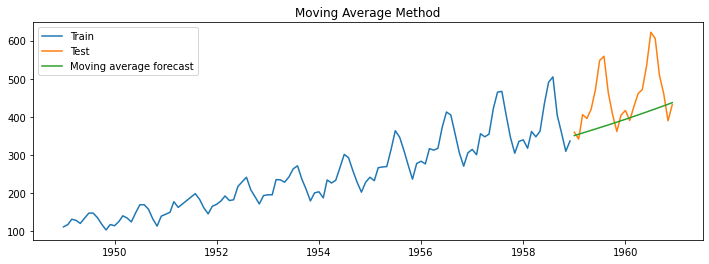

In [113]:
plt.figure(figsize=(12,4))
plt.plot(data['Passengers'][:train_len], label='Train')
plt.plot(data['Passengers'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

### Calculate RMSE and MAPE

In [114]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_ma['ma_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77
0,Moving Average (MA) method,91.21,13.39


## Auto regression moving average method (ARMA)

In [115]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.79714D-01    |proj g|=  3.21346D-02

At iterate    5    f= -8.80033D-01    |proj g|=  1.93444D-03

At iterate   10    f= -8.80045D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     19      1     0     0   4.441D-08  -8.800D-01
  F = -0.88004505310590797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const      0.009624
ar.L1.y   -0.527115
ma.L1.y    0.798281
dtype: flo

 This problem is unconstrained.


### Recover original time series

In [116]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

### Plot train, test and forecast

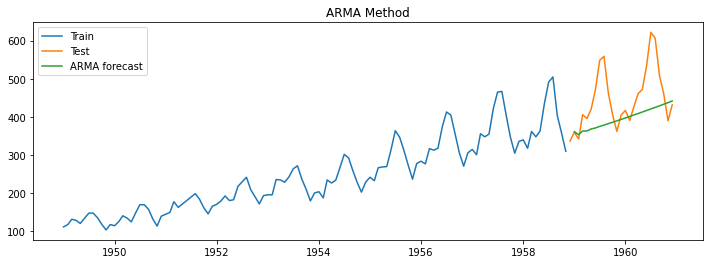

In [117]:
plt.figure(figsize=(12,4))
plt.plot( data['Passengers'][:train_len-1], label='Train')
plt.plot(data['Passengers'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

### Calculate RMSE and MAPE

In [118]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arma['arma_forecast'][train_len-1:])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


## Auto regressive integrated moving average (ARIMA)

In [119]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.79714D-01    |proj g|=  3.21346D-02

At iterate    5    f= -8.80033D-01    |proj g|=  1.93444D-03

At iterate   10    f= -8.80045D-01    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     19      1     0     0   4.441D-08  -8.800D-01
  F = -0.88004505310590797     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
const        0.009624
ar.L1.D.y   -0.527115
ma.L1.D.y    0.798281
dtyp

 This problem is unconstrained.


### Recover original time series forecast

In [120]:
y_hat_arima = data_boxcox_diff.copy().to_frame()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

### Plot train, test and forecast

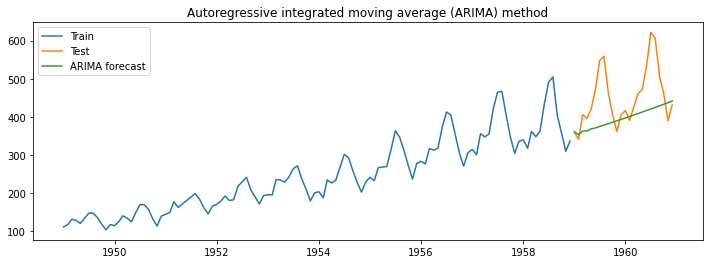

In [121]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [122]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_arima['arima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


## Seasonal auto regressive integrated moving average (SARIMA)

In [123]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.60524D+00    |proj g|=  4.30828D+00

At iterate    5    f= -1.61815D+00    |proj g|=  8.12992D-01

At iterate   10    f= -1.63333D+00    |proj g|=  2.62337D-01

At iterate   15    f= -1.63575D+00    |proj g|=  2.26900D-01

At iterate   20    f= -1.64139D+00    |proj g|=  8.76838D-02

At iterate   25    f= -1.64317D+00    |proj g|=  7.79132D-03

At iterate   30    f= -1.64345D+00    |proj g|=  8.35836D-02

At iterate   35    f= -1.64354D+00    |proj g|=  8.24569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

### Recover original time series forecast

In [124]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

### Plot train, test and forecast

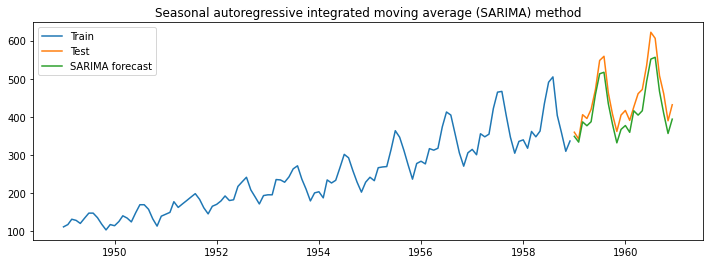

In [125]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

### Calculate RMSE and MAPE

In [126]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


## Seasonal auto regressive integrate moving average with exogenous variable (SARIMAX)

### Import promotion data

In [127]:
promo = pd.read_csv('data/promotion.csv', header = None)
promo.columns = ['Month','Event']
promo['Month'] = pd.to_datetime(promo['Month'], format='%Y-%m')
promo = promo.set_index('Month')
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


### Split promotion data into train and test data sets

In [128]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

### Build SARIMAX model

In [129]:
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=promo_train) 
model_fit = model.fit()
print(model_fit.params)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.61352D+00    |proj g|=  4.68059D+00

At iterate    5    f= -1.62897D+00    |proj g|=  7.29160D-01

At iterate   10    f= -1.63434D+00    |proj g|=  1.70111D+00

At iterate   15    f= -1.64639D+00    |proj g|=  4.50327D-02

At iterate   20    f= -1.64691D+00    |proj g|=  8.69601D-01

At iterate   25    f= -1.65822D+00    |proj g|=  1.80760D+00

At iterate   30    f= -1.66120D+00    |proj g|=  7.55539D-02

At iterate   35    f= -1.66257D+00    |proj g|=  1.88320D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

### Recover original time series forecast

In [130]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=promo_test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

### Plot train, test and forecast

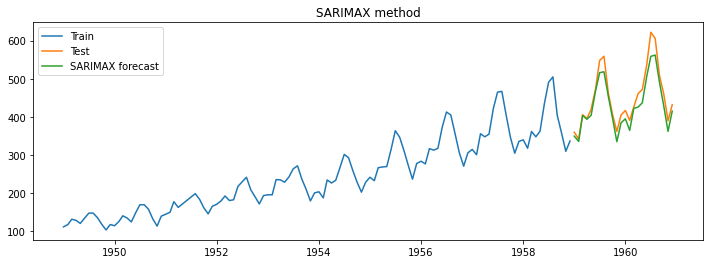

In [131]:
plt.figure(figsize=(12,4))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

### Calculate RMSE and MAPE

In [132]:
rmse = np.sqrt(mean_squared_error(test['Passengers'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Passengers']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Passengers'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,137.51,23.63
0,Simple average method,219.69,44.28
0,Simple moving average forecast,103.33,15.54
0,Simple exponential smoothing forecast,107.65,16.49
0,Holt's exponential smoothing method,71.94,11.11
0,Holt Winters' additive method,35.10,6.53
0,Holt Winters' multiplicative method,34.81,6.91
0,Autoregressive (AR) method,93.39,13.77
0,Moving Average (MA) method,91.21,13.39
0,Autoregressive moving average (ARMA) method,88.88,12.89


# Exchange Rate

In [ ]:
df_exch = pd.read_csv("data/exchange-rate-twi.csv");df_exch
col = 'Exchange Rate TWI'
print(df_exch.shape[0], df_exch[col].isnull().sum(), df_exch[col].mean())

In [ ]:
df_exch.index

In [ ]:
df_exch[col].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('The Exchange rate')
plt.show(block=False)

In [ ]:
adf_test = adfuller(df_exch[col])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

In [ ]:
kpss_test = kpss(df_exch[col])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

In [ ]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Passengers'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

In [ ]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

# Employment Statistics

## Functions

In [ ]:
WIDTH = 14
def plotTimeSeries(data, col, title):
    if col != '':   # dataframe
        data[col].plot(figsize=(WIDTH, 4))
    else:           # series
        data.plot(figsize=(WIDTH, 4))
    plt.legend(loc='best');plt.title(title);plt.show(block=False)

y_hat_ar = pd.DataFrame()
def recoverOriginalSeries(model_fit, data_boxcox_diff, data_boxcox, model):

    print(y_hat_ar.shape[0])
    y_hat_ar[f'{model}_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
    y_hat_ar[f'{model}_forecast_boxcox']      = y_hat_ar[f'{model}_forecast_boxcox_diff'].cumsum()
    y_hat_ar[f'{model}_forecast_boxcox']      = y_hat_ar[f'{model}_forecast_boxcox'].add(data_boxcox[0])
    y_hat_ar[f'{model}_forecast']             = np.exp(y_hat_ar[f'{model}_forecast_boxcox'])
    print(y_hat_ar.shape[0])
    return y_hat_ar

def plotTrainTestSeries(train, test, y_hat, model, title):
    plt.figure(figsize=(WIDTH,4))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    print(test.index.min())
    plt.plot(y_hat[f'{model}_forecast'][test.index.min():], label=f'{title} forecast')
    plt.legend(loc='best')
    plt.title(f'{title} Method')
    plt.show()

## Read and inspect the time series

In [ ]:
df_emp = pd.read_csv("data/unrate.csv",header=None);
df_emp.columns = ['DATE', 'UNRATE']
COL = "UNRATE"
LEN = 612
print(df_emp.shape[0], df_emp[COL].isnull().sum(), df_emp[COL].mean())
df_emp.head()

In [ ]:
plotTimeSeries(df_emp, COL, 'The Employment rate')

There is some seasonality. Trend?? Stationarity? Autocorrelation?

## Stationarity Test

In [ ]:
adf_test = adfuller(df_emp[COL])
print('ADF Statistic: %f' % adf_test[0], 'Critical Values @ 0.05: %.2f' % adf_test[4]['5%'], 'p-value: %f' % adf_test[1])
kpss_test = kpss(df_emp[COL])
print('KPSS Statistic: %f' % kpss_test[0], 'Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'], 'p-value: %f' % kpss_test[1])

This time series is not statioanry

## Make it stationary - remove variance and trend

In [ ]:
#df_emp_boxcox = df_emp.copy()
data_emp_boxcox = pd.Series(boxcox(df_emp[COL], lmbda=0), index=df_emp.index)
plotTimeSeries(data_emp_boxcox, '','After Box Cox tranformation')

#df_emp_boxcox_diff = df_emp_boxcox.copy()
data_emp_boxcox_diff = pd.Series(data_emp_boxcox - data_emp_boxcox.shift(), index=df_emp.index)
plotTimeSeries(data_emp_boxcox_diff, '','After Box Cox tranformation and differencing')
data_emp_boxcox_diff.dropna(inplace=True)

data_emp_boxcox_diff.head()

In [ ]:
adf_test = adfuller(data_emp_boxcox_diff)
print('ADF Statistic: %f' % adf_test[0], 'Critical Values @ 0.05: %.2f' % adf_test[4]['5%'], 'p-value: %f' % adf_test[1])
kpss_test = kpss(data_emp_boxcox_diff)
print('KPSS Statistic: %f' % kpss_test[0], 'Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'], 'p-value: %f' % kpss_test[1])

Time series is stationary

## Split the data into train and test sets

In [ ]:
df_emp_train = df_emp[:LEN]; df_emp_test  = df_emp[LEN:]
data_emp_boxcox_train = data_emp_boxcox[:LEN]; data_emp_boxcox_test  = data_emp_boxcox[LEN:]
data_emp_boxcox_diff_train    = data_emp_boxcox_diff[:LEN-1]; data_emp_boxcox_diff_test     = data_emp_boxcox_diff[LEN-1:]

data_emp_boxcox_diff_train.head()

In [ ]:
df_emp_test.head()

## Auto regression method (AR)

In [ ]:
model = ARIMA(data_emp_boxcox_diff_train, order=(12, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
recoverOriginalSeries(model_fit, data_emp_boxcox_diff, data_emp_boxcox, 'ar' ); y_hat_ar.head()

In [ ]:
plotTrainTestSeries(df_emp_train[COL], df_emp_test[COL], y_hat_ar, 'ar', 'Auto regression')

In [ ]:
data_emp_boxcox_diff.index

In [ ]:
print(df_emp.shape[0], df_emp_train.shape[0], df_emp_test.shape[0])

print(data_emp_boxcox.shape[0], data_emp_boxcox_train.shape[0], data_emp_boxcox_test.shape[0])
print(data_emp_boxcox_diff.shape[0], data_emp_boxcox_diff_train.shape[0], data_emp_boxcox_diff_test.shape[0])

print(y_hat_ar.shape[0], y_hat_ar[data_emp_boxcox_diff.index.min()-1:].shape[0], y_hat_ar[:data_emp_boxcox_diff.index.max()].shape[0])
print(y_hat_ar[data_emp_boxcox_diff.index.min()-1:data_emp_boxcox_diff.index.max()].shape[0])

In [ ]:
df_emp_test.index.min()

In [ ]:
rmse = np.sqrt(mean_squared_error(df_emp_test[COL], y_hat_ar['ar_forecast'][LEN-1:])).round(2)
mape = np.round(np.mean(np.abs(df_emp_test[COL]-y_hat_ar['ar_forecast'][LEN-1:])/df_emp_test[COL])*100,2)

results = pd.DataFrame({'Method':['Autoregressive (AR)'], 'MAPE': [mape], 'RMSE': [rmse]})
#results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
df_emp[df_emp['DATE']=='01-06-1948']['UNRATE']

In [ ]:
df_emp.head(6)

In [ ]:
y_hat_ar.head(7)

In [ ]:
y_hat_ar.loc[6,'ar_forecast']

## Moving Average (MA)

In [ ]:
model = ARIMA(data_emp_boxcox_diff_train, order=(0, 0, 5)) 
model_fit = model.fit()
print(model_fit.params)

In [ ]:
recoverOriginalSeries(model_fit, data_emp_boxcox_diff, data_emp_boxcox, 'ma'); y_hat_ar.head()

In [ ]:
plotTrainTestSeries(df_emp_train[COL], df_emp_test[COL], y_hat_ar, 'ma', 'Moving Average')

In [ ]:
rmse = np.sqrt(mean_squared_error(df_emp_test[COL], y_hat_ar['ma_forecast'][LEN-1:])).round(2)
mape = np.round(np.mean(np.abs(df_emp_test[COL]-y_hat_ar['ma_forecast'][LEN-1:])/df_emp_test[COL])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA)'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

In [ ]:
y_hat_ar.head(7)